## Задача о назначениях
Необходимо собрать команду разработчиков для создания компьтерной игры. Необходимо выбрать: художника, тестировщика, сценариста, композитора, геймдизайнера и программиста. На выбор даны девять кандидатов. Известны заработная плата, которую они хотят, а также степень их заинтересованности. Необходимо назначить кандидатов так, чтобы на каждую должность должен быть назначен сотрудник.Заинтересованность кандидатов должна быть максимальной, а зарплата как можно более низкой.

### Загружаем исходные данные

In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
import pandas as pd
import numpy as np

df_salary_org = pd.read_csv('/content/gdrive/MyDrive/TPR/Z1/Data_salary.csv', encoding="cp1251", sep=';')
df_salary_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог
0,Исполнитель1,50,80,90,70,40,90
1,Исполнитель2,90,60,30,50,80,60
2,Исполнитель3,20,50,70,80,40,30
3,Исполнитель4,70,80,60,40,30,50
4,Исполнитель5,100,30,50,90,50,80
5,Исполнитель6,30,60,40,60,20,70
6,Исполнитель7,60,40,20,30,60,50
7,Исполнитель8,40,30,80,50,70,40
8,Исполнитель9,80,70,50,70,80,20


In [65]:
df_motivation_org = pd.read_csv('/content/gdrive/MyDrive/TPR/Z1/Data_motivation.csv', encoding="cp1251", sep=';')
df_motivation_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог
0,Исполнитель1,90,60,50,30,50,80
1,Исполнитель2,50,90,30,60,80,20
2,Исполнитель3,70,80,50,70,40,40
3,Исполнитель4,40,70,60,80,30,90
4,Исполнитель5,70,50,90,80,40,50
5,Исполнитель6,50,40,80,30,70,50
6,Исполнитель7,30,50,20,40,60,70
7,Исполнитель8,60,30,40,20,20,60
8,Исполнитель9,90,20,70,50,40,80


### Устанавливаем библиотеку

In [66]:
pip install hungarian-algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import numpy as np
from hungarian_algorithm import algorithm

### Добавляем 3 фиктивные должности 

In [68]:
import random
numbers = [20, 30, 40, 50, 60, 70, 80, 90]

line = ''

for i in range(9):
     line = line + str(random.choice(numbers)) + ', '
line

'60, 50, 70, 50, 90, 70, 90, 90, 50, '

In [69]:
df_salary_org["Fake1"] = [20, 50, 70, 80, 40, 60, 50, 30, 40]
df_salary_org["Fake2"] = [90, 30, 60, 40, 50, 90, 20, 90, 40]
df_salary_org["Fake3"] = [70, 30, 80, 40, 30, 80, 40, 50, 50]
df_motivation_org["Fake1"] = [40, 40, 20, 50, 30, 90, 80, 20, 60]
df_motivation_org["Fake2"] = [60, 40, 60, 50, 50, 90, 50, 60, 30]
df_motivation_org["Fake3"] = [70, 20, 40, 80, 20, 90, 20, 60, 80]

In [70]:
df_salary_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,Исполнитель1,50,80,90,70,40,90,20,90,70
1,Исполнитель2,90,60,30,50,80,60,50,30,30
2,Исполнитель3,20,50,70,80,40,30,70,60,80
3,Исполнитель4,70,80,60,40,30,50,80,40,40
4,Исполнитель5,100,30,50,90,50,80,40,50,30
5,Исполнитель6,30,60,40,60,20,70,60,90,80
6,Исполнитель7,60,40,20,30,60,50,50,20,40
7,Исполнитель8,40,30,80,50,70,40,30,90,50
8,Исполнитель9,80,70,50,70,80,20,40,40,50


In [71]:
df_motivation_org

,Исполнители,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,Исполнитель1,90,60,50,30,50,80,40,60,70
1,Исполнитель2,50,90,30,60,80,20,40,40,20
2,Исполнитель3,70,80,50,70,40,40,20,60,40
3,Исполнитель4,40,70,60,80,30,90,50,50,80
4,Исполнитель5,70,50,90,80,40,50,30,50,20
5,Исполнитель6,50,40,80,30,70,50,90,90,90
6,Исполнитель7,30,50,20,40,60,70,80,50,20
7,Исполнитель8,60,30,40,20,20,60,20,60,60
8,Исполнитель9,90,20,70,50,40,80,60,30,80


### Преобразуем таблицы в массивы

In [72]:
df_salary = df_salary_org.drop('Исполнители', axis=1)
df_salary

,Художник,Тестировщик,Сценарист,Композитор,Геймдизайнер,Маркетолог,Fake1,Fake2,Fake3
0,50,80,90,70,40,90,20,90,70
1,90,60,30,50,80,60,50,30,30
2,20,50,70,80,40,30,70,60,80
3,70,80,60,40,30,50,80,40,40
4,100,30,50,90,50,80,40,50,30
5,30,60,40,60,20,70,60,90,80
6,60,40,20,30,60,50,50,20,40
7,40,30,80,50,70,40,30,90,50
8,80,70,50,70,80,20,40,40,50


In [73]:
tab_salary = np.array(df_salary)
tab_salary

array([[ 50,  80,  90,  70,  40,  90,  20,  90,  70],
       [ 90,  60,  30,  50,  80,  60,  50,  30,  30],
       [ 20,  50,  70,  80,  40,  30,  70,  60,  80],
       [ 70,  80,  60,  40,  30,  50,  80,  40,  40],
       [100,  30,  50,  90,  50,  80,  40,  50,  30],
       [ 30,  60,  40,  60,  20,  70,  60,  90,  80],
       [ 60,  40,  20,  30,  60,  50,  50,  20,  40],
       [ 40,  30,  80,  50,  70,  40,  30,  90,  50],
       [ 80,  70,  50,  70,  80,  20,  40,  40,  50]])

In [74]:
df_motivation = df_motivation_org.drop('Исполнители', axis=1)
tab_motivation = np.array(df_motivation)
tab_motivation

array([[90, 60, 50, 30, 50, 80, 40, 60, 70],
       [50, 90, 30, 60, 80, 20, 40, 40, 20],
       [70, 80, 50, 70, 40, 40, 20, 60, 40],
       [40, 70, 60, 80, 30, 90, 50, 50, 80],
       [70, 50, 90, 80, 40, 50, 30, 50, 20],
       [50, 40, 80, 30, 70, 50, 90, 90, 90],
       [30, 50, 20, 40, 60, 70, 80, 50, 20],
       [60, 30, 40, 20, 20, 60, 20, 60, 60],
       [90, 20, 70, 50, 40, 80, 60, 30, 80]])

### Находим суммы значений для каждого столбца

In [75]:
sum_salary = list(map(sum,zip(*tab_salary)))
sum_salary

[540, 500, 490, 540, 470, 490, 440, 510, 470]

In [76]:
sum_motivation = list(map(sum,zip(*tab_motivation)))
sum_motivation

[550, 490, 490, 460, 430, 540, 430, 490, 480]

In [77]:
list_motivation = np.array(tab_motivation).tolist()
list_salary = np.array(tab_salary).tolist()

### Производим нормализацию таблиц

In [78]:
for i in range(len(list_salary)):
  for j in range(len(list_salary)):
    list_salary[j][i]=float(list_salary[j][i])/float(sum_salary[i])
print(np.copy(list_salary))

[[0.09259259 0.16       0.18367347 0.12962963 0.08510638 0.18367347
  0.04545455 0.17647059 0.14893617]
 [0.16666667 0.12       0.06122449 0.09259259 0.17021277 0.12244898
  0.11363636 0.05882353 0.06382979]
 [0.03703704 0.1        0.14285714 0.14814815 0.08510638 0.06122449
  0.15909091 0.11764706 0.17021277]
 [0.12962963 0.16       0.12244898 0.07407407 0.06382979 0.10204082
  0.18181818 0.07843137 0.08510638]
 [0.18518519 0.06       0.10204082 0.16666667 0.10638298 0.16326531
  0.09090909 0.09803922 0.06382979]
 [0.05555556 0.12       0.08163265 0.11111111 0.04255319 0.14285714
  0.13636364 0.17647059 0.17021277]
 [0.11111111 0.08       0.04081633 0.05555556 0.12765957 0.10204082
  0.11363636 0.03921569 0.08510638]
 [0.07407407 0.06       0.16326531 0.09259259 0.14893617 0.08163265
  0.06818182 0.17647059 0.10638298]
 [0.14814815 0.14       0.10204082 0.12962963 0.17021277 0.04081633
  0.09090909 0.07843137 0.10638298]]


In [79]:
for i in range(len(list_salary)):
  for j in range(len(list_salary)):
    list_motivation[j][i]=float(list_motivation[j][i])/float(sum_motivation[i])
print(np.copy(list_motivation))

[[0.16363636 0.12244898 0.10204082 0.06521739 0.11627907 0.14814815
  0.09302326 0.12244898 0.14583333]
 [0.09090909 0.18367347 0.06122449 0.13043478 0.18604651 0.03703704
  0.09302326 0.08163265 0.04166667]
 [0.12727273 0.16326531 0.10204082 0.15217391 0.09302326 0.07407407
  0.04651163 0.12244898 0.08333333]
 [0.07272727 0.14285714 0.12244898 0.17391304 0.06976744 0.16666667
  0.11627907 0.10204082 0.16666667]
 [0.12727273 0.10204082 0.18367347 0.17391304 0.09302326 0.09259259
  0.06976744 0.10204082 0.04166667]
 [0.09090909 0.08163265 0.16326531 0.06521739 0.1627907  0.09259259
  0.20930233 0.18367347 0.1875    ]
 [0.05454545 0.10204082 0.04081633 0.08695652 0.13953488 0.12962963
  0.18604651 0.10204082 0.04166667]
 [0.10909091 0.06122449 0.08163265 0.04347826 0.04651163 0.11111111
  0.04651163 0.12244898 0.125     ]
 [0.16363636 0.04081633 0.14285714 0.10869565 0.09302326 0.14814815
  0.13953488 0.06122449 0.16666667]]


### Создаем таблицу для общих критериев

In [80]:
list_comb = list_salary
for i in range(len(list_salary)):
  for j in range(len(list_salary)):
    list_comb[i][j]=(list_salary[i][j]+list_motivation[i][j])/2

print(np.copy(list_comb))

[[0.12811448 0.14122449 0.14285714 0.09742351 0.10069273 0.16591081
  0.0692389  0.14945978 0.14738475]
 [0.12878788 0.15183673 0.06122449 0.11151369 0.17812964 0.07974301
  0.10332981 0.07022809 0.05274823]
 [0.08215488 0.13163265 0.12244898 0.15016103 0.08906482 0.06764928
  0.10280127 0.12004802 0.12677305]
 [0.10117845 0.15142857 0.12244898 0.12399356 0.06679861 0.13435374
  0.14904863 0.09023609 0.12588652]
 [0.15622896 0.08102041 0.14285714 0.17028986 0.09970312 0.12792895
  0.08033827 0.10004002 0.05274823]
 [0.07323232 0.10081633 0.12244898 0.08816425 0.10267194 0.11772487
  0.17283298 0.18007203 0.17885638]
 [0.08282828 0.09102041 0.04081633 0.07125604 0.13359723 0.11583522
  0.14984144 0.07062825 0.06338652]
 [0.09158249 0.06061224 0.12244898 0.06803543 0.0977239  0.09637188
  0.05734672 0.14945978 0.11569149]
 [0.15589226 0.09040816 0.12244898 0.11916264 0.13161801 0.09448224
  0.11522199 0.06982793 0.13652482]]


### Конвертируем все данные в словари, с которыми работает библиотека

In [81]:
candidate1 = list_comb[0]
candidate2 = list_comb[1]
candidate3 = list_comb[2]
candidate4 = list_comb[3]
candidate5 = list_comb[4]
candidate6 = list_comb[5]
candidate7 = list_comb[6]
candidate8 = list_comb[7]
candidate9 = list_comb[8]


res = pd.DataFrame([candidate1, candidate2, candidate3, candidate4, candidate5, candidate6, candidate7, candidate8, candidate9], 
             columns=['Художник', 'Тестировщик', 'Сценарист', 'Композитор', 'Геймдизайнер', 'Маркетолог', 'Fake1', 'Fake2', 'Fake3'])

new_col = ['Исполнитель1', 'Исполнитель2', 'Исполнитель3', 'Исполнитель4', 'Исполнитель5', 'Исполнитель6', 'Исполнитель7', 'Исполнитель8', 'Исполнитель9']
 
res.insert(loc = 0,
           column = 'Исполнители',
          value = new_col)

In [82]:
res = res.set_index('Исполнители')
res.index.names = [None]
dict_comb = res.to_dict('index')
dict_comb

{'Исполнитель1': {'Художник': 0.12811447811447813,
  'Тестировщик': 0.14122448979591837,
  'Сценарист': 0.14285714285714285,
  'Композитор': 0.09742351046698872,
  'Геймдизайнер': 0.10069272637308263,
  'Маркетолог': 0.1659108087679516,
  'Fake1': 0.06923890063424948,
  'Fake2': 0.14945978391356543,
  'Fake3': 0.14738475177304966},
 'Исполнитель2': {'Художник': 0.12878787878787878,
  'Тестировщик': 0.15183673469387754,
  'Сценарист': 0.061224489795918366,
  'Композитор': 0.11151368760064412,
  'Геймдизайнер': 0.1781296387926769,
  'Маркетолог': 0.07974300831443688,
  'Fake1': 0.10332980972515857,
  'Fake2': 0.0702280912364946,
  'Fake3': 0.05274822695035461},
 'Исполнитель3': {'Художник': 0.08215488215488215,
  'Тестировщик': 0.13163265306122449,
  'Сценарист': 0.12244897959183673,
  'Композитор': 0.1501610305958132,
  'Геймдизайнер': 0.08906481939633845,
  'Маркетолог': 0.06764928193499622,
  'Fake1': 0.10280126849894292,
  'Fake2': 0.12004801920768307,
  'Fake3': 0.12677304964539007}

In [83]:
df_salary = df_salary_org.set_index('Исполнители')
df_salary.index.names = [None]
dict_salary = df_salary.to_dict('index')
dict_salary

{'Исполнитель1': {'Художник': 50,
  'Тестировщик': 80,
  'Сценарист': 90,
  'Композитор': 70,
  'Геймдизайнер': 40,
  'Маркетолог': 90,
  'Fake1': 20,
  'Fake2': 90,
  'Fake3': 70},
 'Исполнитель2': {'Художник': 90,
  'Тестировщик': 60,
  'Сценарист': 30,
  'Композитор': 50,
  'Геймдизайнер': 80,
  'Маркетолог': 60,
  'Fake1': 50,
  'Fake2': 30,
  'Fake3': 30},
 'Исполнитель3': {'Художник': 20,
  'Тестировщик': 50,
  'Сценарист': 70,
  'Композитор': 80,
  'Геймдизайнер': 40,
  'Маркетолог': 30,
  'Fake1': 70,
  'Fake2': 60,
  'Fake3': 80},
 'Исполнитель4': {'Художник': 70,
  'Тестировщик': 80,
  'Сценарист': 60,
  'Композитор': 40,
  'Геймдизайнер': 30,
  'Маркетолог': 50,
  'Fake1': 80,
  'Fake2': 40,
  'Fake3': 40},
 'Исполнитель5': {'Художник': 100,
  'Тестировщик': 30,
  'Сценарист': 50,
  'Композитор': 90,
  'Геймдизайнер': 50,
  'Маркетолог': 80,
  'Fake1': 40,
  'Fake2': 50,
  'Fake3': 30},
 'Исполнитель6': {'Художник': 30,
  'Тестировщик': 60,
  'Сценарист': 40,
  'Композитор':

In [84]:
df_motivation  = df_motivation_org.set_index('Исполнители')
df_motivation .index.names = [None]
dict_motivation  = df_motivation.to_dict('index')
dict_motivation 

{'Исполнитель1': {'Художник': 90,
  'Тестировщик': 60,
  'Сценарист': 50,
  'Композитор': 30,
  'Геймдизайнер': 50,
  'Маркетолог': 80,
  'Fake1': 40,
  'Fake2': 60,
  'Fake3': 70},
 'Исполнитель2': {'Художник': 50,
  'Тестировщик': 90,
  'Сценарист': 30,
  'Композитор': 60,
  'Геймдизайнер': 80,
  'Маркетолог': 20,
  'Fake1': 40,
  'Fake2': 40,
  'Fake3': 20},
 'Исполнитель3': {'Художник': 70,
  'Тестировщик': 80,
  'Сценарист': 50,
  'Композитор': 70,
  'Геймдизайнер': 40,
  'Маркетолог': 40,
  'Fake1': 20,
  'Fake2': 60,
  'Fake3': 40},
 'Исполнитель4': {'Художник': 40,
  'Тестировщик': 70,
  'Сценарист': 60,
  'Композитор': 80,
  'Геймдизайнер': 30,
  'Маркетолог': 90,
  'Fake1': 50,
  'Fake2': 50,
  'Fake3': 80},
 'Исполнитель5': {'Художник': 70,
  'Тестировщик': 50,
  'Сценарист': 90,
  'Композитор': 80,
  'Геймдизайнер': 40,
  'Маркетолог': 50,
  'Fake1': 30,
  'Fake2': 50,
  'Fake3': 20},
 'Исполнитель6': {'Художник': 50,
  'Тестировщик': 40,
  'Сценарист': 80,
  'Композитор': 

### Поиск по первому критерию

In [85]:
algorithm.find_matching(dict_salary, matching_type = 'min', return_type = 'list' )

[(('Исполнитель2', 'Сценарист'), 30),
 (('Исполнитель4', 'Композитор'), 40),
 (('Исполнитель7', 'Fake2'), 20),
 (('Исполнитель3', 'Художник'), 20),
 (('Исполнитель8', 'Тестировщик'), 30),
 (('Исполнитель9', 'Маркетолог'), 20),
 (('Исполнитель1', 'Fake1'), 20),
 (('Исполнитель6', 'Геймдизайнер'), 20),
 (('Исполнитель5', 'Fake3'), 30)]

### Поиск по второму критерию

In [86]:
algorithm.find_matching(dict_motivation, matching_type = 'max', return_type = 'list' )

[(('Исполнитель8', 'Fake2'), 60),
 (('Исполнитель9', 'Художник'), 90),
 (('Исполнитель5', 'Сценарист'), 90),
 (('Исполнитель7', 'Fake1'), 80),
 (('Исполнитель1', 'Маркетолог'), 80),
 (('Исполнитель6', 'Fake3'), 90),
 (('Исполнитель4', 'Композитор'), 80),
 (('Исполнитель2', 'Геймдизайнер'), 80),
 (('Исполнитель3', 'Тестировщик'), 80)]

### Поиск по двум критериям

In [87]:
algorithm.find_matching(dict_comb, matching_type = 'min', return_type = 'list' )

[(('Исполнитель5', 'Тестировщик'), 0.0810204081632653),
 (('Исполнитель4', 'Геймдизайнер'), 0.06679861454725383),
 (('Исполнитель3', 'Маркетолог'), 0.06764928193499622),
 (('Исполнитель1', 'Fake1'), 0.06923890063424948),
 (('Исполнитель6', 'Художник'), 0.07323232323232323),
 (('Исполнитель9', 'Fake2'), 0.069827931172469),
 (('Исполнитель2', 'Fake3'), 0.05274822695035461),
 (('Исполнитель7', 'Сценарист'), 0.04081632653061224),
 (('Исполнитель8', 'Композитор'), 0.0680354267310789)]

* Исполнитель 3 будет работать маркетологом
* Исполнитель 4 будет работать геймдизайнером
* Исполнитель 5 будет работать тестировщиком
* Исполнитель 6 будет работать художником
* Исполнитель 7 будет работать сценаристом
* Исполнитель 8 будет работать композитором
* Исполнители 1, 2 и 9 работают на фейковых работах


In [88]:
Result_min = [[20,70],
        [40,80],
        [20,70],
        [20,20],
        [30,30],
        [20,80]]

In [89]:
Result_max = [[90,80],
        [80,80],
        [50,80],
        [40,80],
        [50,90],
        [80,90]]

In [90]:
Result = [[30,40],
        [30,30],
        [30,50],
        [30,50],
        [20,20],
        [50,20]]

Summ=0
Motivation=0
for i in range(len(Result)):
  Summ+=Result[i][0]
  Motivation+=Result[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 190   Мотивация: 210


In [91]:
Summ=0
Motivation=0
for i in range(len(Result_min)):
  Summ+=Result_min[i][0]
  Motivation+=Result_min[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 150   Мотивация: 350


In [92]:
Summ=0
Motivation=0
for i in range(len(Result_max)):
  Summ+=Result_max[i][0]
  Motivation+=Result_max[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 390   Мотивация: 500


Text(0.5, 1.0, 'Зарплата')

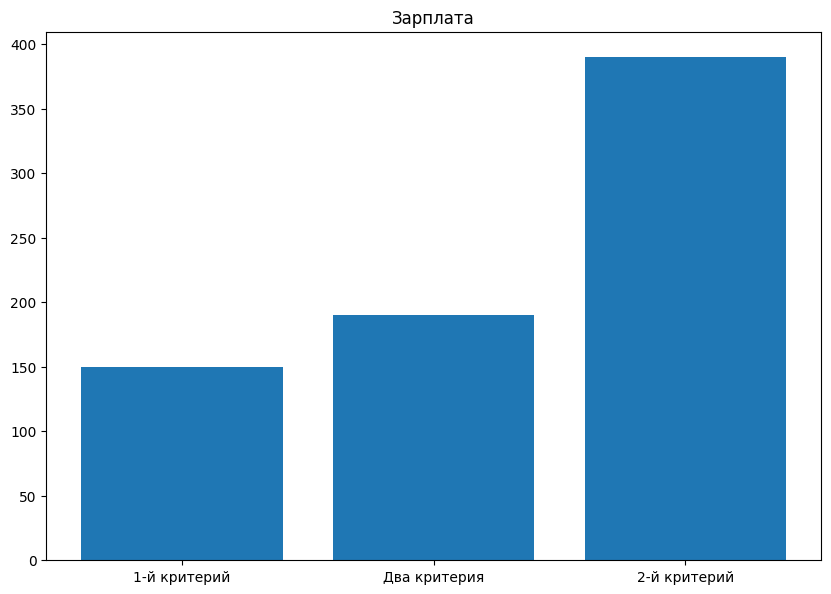

In [93]:
import matplotlib.pyplot as plt

x = np.arange(3)
plt.figure(figsize=(10, 7), dpi=100)
plt.bar(x, height=[150,190,390])
plt.xticks(x, ['1-й критерий','Два критерия','2-й критерий']);
plt.title("Зарплата")

Text(0.5, 1.0, 'Мотивация')

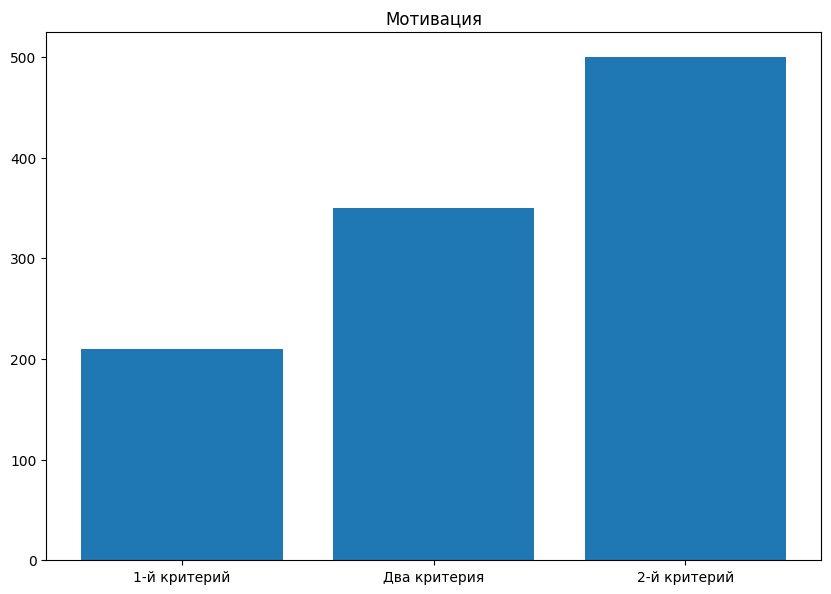

In [94]:
x = np.arange(3)
plt.figure(figsize=(10, 7), dpi=100)
plt.bar(x, height=[210,350,500])
plt.xticks(x, ['1-й критерий','Два критерия','2-й критерий'])
plt.title("Мотивация")

### Распределим незадействованных исполнителей на работы

### По первому критерию

In [95]:
list_salary_fake = [[ 50,  80,  90,  70,  40,  90],
                    [ 90,  60,  30,  50,  80,  60],
                    [80,  70,  50,  70,  80,  20]]
list_salary_fake

[[50, 80, 90, 70, 40, 90], [90, 60, 30, 50, 80, 60], [80, 70, 50, 70, 80, 20]]

### По второму критерию

In [96]:
list_motivation_fake = [[90, 60, 50, 30, 50, 80],
                        [50, 90, 30, 60, 80, 20],
                        [90, 20, 70, 50, 40, 80]]
list_motivation_fake

[[90, 60, 50, 30, 50, 80], [50, 90, 30, 60, 80, 20], [90, 20, 70, 50, 40, 80]]

### Ищем суммы для каждого столбца

In [97]:
sum_salary_fake = list(map(sum,zip(*list_salary_fake)))
sum_salary_fake

[220, 210, 170, 190, 200, 170]

In [98]:
sum_motivation_fake = list(map(sum,zip(*list_motivation_fake)))
sum_motivation_fake

[230, 170, 150, 140, 170, 180]

### Нормализуем таблицы

In [99]:
for i in range(6):
  for j in range(3):
    list_salary_fake[j][i]=float(list_salary_fake[j][i])/float(sum_salary_fake[i])
print(np.copy(list_salary_fake))


[[0.22727273 0.38095238 0.52941176 0.36842105 0.2        0.52941176]
 [0.40909091 0.28571429 0.17647059 0.26315789 0.4        0.35294118]
 [0.36363636 0.33333333 0.29411765 0.36842105 0.4        0.11764706]]


In [100]:
for i in range(6):
  for j in range(3):
    list_motivation_fake[j][i]=float(list_motivation_fake[j][i])/float(sum_motivation_fake[i])
print(np.copy(list_motivation_fake))

[[0.39130435 0.35294118 0.33333333 0.21428571 0.29411765 0.44444444]
 [0.2173913  0.52941176 0.2        0.42857143 0.47058824 0.11111111]
 [0.39130435 0.11764706 0.46666667 0.35714286 0.23529412 0.44444444]]


### Таблица с общими критериями

In [101]:
list_comb_fake = list_salary_fake 
for i in range(3):
  for j in range(6):
    list_comb_fake[i][j]=(list_salary_fake[i][j]+list_motivation_fake[i][j])/2

print(np.copy(list_comb_fake))

[[0.30928854 0.36694678 0.43137255 0.29135338 0.24705882 0.4869281 ]
 [0.31324111 0.40756303 0.18823529 0.34586466 0.43529412 0.23202614]
 [0.37747036 0.2254902  0.38039216 0.36278195 0.31764706 0.28104575]]


### Конвертируем данные в словари

In [102]:
dict_salary_fake = {'Исполнитель1': {'Художник': 50, 'Тестировщик': 80, 'Сценарист': 90, 'Композитор': 70, 'Геймдизайнер': 40, 'Маркетолог': 90},  
                    'Исполнитель2': {'Художник': 90, 'Тестировщик': 60, 'Сценарист': 30, 'Композитор': 50, 'Геймдизайнер': 80, 'Маркетолог': 60},
                    'Исполнитель9': {'Художник': 80, 'Тестировщик': 70, 'Сценарист': 50, 'Композитор': 70, 'Геймдизайнер': 80, 'Маркетолог': 20},
                    'Fake1': {'Художник': 100, 'Тестировщик': 97, 'Сценарист': 94, 'Композитор': 91, 'Геймдизайнер': 95, 'Маркетолог': 91},
                    'Fake2': {'Художник': 99, 'Тестировщик': 96, 'Сценарист': 93, 'Композитор': 94, 'Геймдизайнер': 91, 'Маркетолог': 92},
                    'Fake3': {'Художник': 98, 'Тестировщик': 95, 'Сценарист': 92, 'Композитор': 92, 'Геймдизайнер': 94, 'Маркетолог': 93},
}      

dict_motivation_fake = {'Исполнитель1': {'Художник': 90, 'Тестировщик': 60, 'Сценарист': 50, 'Композитор': 30, 'Геймдизайнер': 50, 'Маркетолог': 80},
                        'Исполнитель2': {'Художник': 50, 'Тестировщик': 90, 'Сценарист': 30, 'Композитор': 60, 'Геймдизайнер': 80, 'Маркетолог': 20},
                        'Исполнитель9': {'Художник': 90, 'Тестировщик': 20, 'Сценарист': 70, 'Композитор': 50, 'Геймдизайнер': 40, 'Маркетолог': 80},
                        'Fake1': {'Художник': 1, 'Тестировщик': 2, 'Сценарист': 3, 'Композитор': 4, 'Геймдизайнер': 5, 'Маркетолог': 6},
                        'Fake2': {'Художник': 7, 'Тестировщик': 8, 'Сценарист': 9, 'Композитор': 1, 'Геймдизайнер': 2, 'Маркетолог': 3},
                        'Fake3': {'Художник': 4, 'Тестировщик': 5, 'Сценарист': 6, 'Композитор': 7, 'Геймдизайнер': 8, 'Маркетолог': 9},}

dict_comb_fake = {'Исполнитель1': {'Художник': 0.3708004, 'Тестировщик': 0.35644258, 'Сценарист': 0.35784314, 'Композитор': 0.29135338, 'Геймдизайнер': 0.24705882, 'Маркетолог': 0.4869281},
                  'Исполнитель2': {'Художник': 0.24135375, 'Тестировщик': 0.49894958, 'Сценарист': 0.19705882, 'Композитор': 0.34586466, 'Геймдизайнер': 0.43529412, 'Маркетолог': 0.23202614},
                  'Исполнитель9': {'Художник': 0.38784585, 'Тестировщик': 0.14460784, 'Сценарист': 0.44509804, 'Композитор': 0.36278195, 'Геймдизайнер': 0.31764706, 'Маркетолог': 0.28104575},
                  'Fake1': {'Художник': 0.39, 'Тестировщик': 0.5, 'Сценарист': 0.45, 'Композитор': 0.38, 'Геймдизайнер': 0.436, 'Маркетолог': 0.49},
                  'Fake2': {'Художник': 0.4, 'Тестировщик': 0.51, 'Сценарист': 0.451, 'Композитор': 0.365, 'Геймдизайнер': 0.438, 'Маркетолог': 0.48},
                  'Fake3': {'Художник': 0.41, 'Тестировщик': 0.52, 'Сценарист': 0.452, 'Композитор': 0.37, 'Геймдизайнер': 0.437, 'Маркетолог': 0.491},}

### Поиск по первому критерию

In [103]:
algorithm.find_matching(dict_salary_fake, matching_type = 'min', return_type = 'list' )

[(('Исполнитель2', 'Сценарист'), 30),
 (('Fake3', 'Тестировщик'), 95),
 (('Исполнитель1', 'Геймдизайнер'), 40),
 (('Исполнитель9', 'Маркетолог'), 20),
 (('Fake1', 'Композитор'), 91),
 (('Fake2', 'Художник'), 99)]

### Поиск по второму критерию

In [104]:
algorithm.find_matching(dict_motivation_fake, matching_type = 'max', return_type = 'list' )

[(('Исполнитель2', 'Тестировщик'), 90),
 (('Исполнитель9', 'Художник'), 90),
 (('Fake3', 'Геймдизайнер'), 8),
 (('Исполнитель1', 'Маркетолог'), 80),
 (('Fake1', 'Композитор'), 4),
 (('Fake2', 'Сценарист'), 9)]

### Поиск по двум критериям

In [105]:
algorithm.find_matching(dict_comb_fake, matching_type = 'min', return_type = 'list' )

[(('Fake1', 'Художник'), 0.39),
 (('Исполнитель9', 'Тестировщик'), 0.14460784),
 (('Fake3', 'Композитор'), 0.37),
 (('Fake2', 'Маркетолог'), 0.48),
 (('Исполнитель2', 'Сценарист'), 0.19705882),
 (('Исполнитель1', 'Геймдизайнер'), 0.24705882)]

В результате работы венгерского алгоритма "Исполнитель 1" был назначен геймдизайнером, "Исполнитель 2" сценаристом, а "Исполнитель 9" тестировщиком.

In [106]:
Salary=[[30,40],
        [40,30],
        [30,50],
        [30,50],
        [20,20],
        [50,20],
        [40,50],
        [30,30],
        [70,20]]

Summ=0
Motivation=0
for i in range(len(Salary)):
  Summ+=Salary[i][0]
  Motivation+=Salary[i][1]

print("Зарплата:",Summ," ","Мотивация:", Motivation)

Зарплата: 340   Мотивация: 310
